In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm

diff90_threshold = 10 #Angle needs to be within 10 degrees of 90 degrees to qualify as reset point

In [2]:
#read in the data
df=pd.read_csv('Data/bodyweight_squat_side_view.csv')
df.head()

,Pelvis,SpineNavel,SpineChest,Neck,ClavicleLeft,ShoulderLeft,ElbowLeft,WristLeft,HandLeft,HandTipLeft,...,HipRight,KneeRight,AnkleRight,FootRight,Head,Nose,EyeLeft,EarLeft,EyeRight,EarRight
0,-0.0031308765 -0.17032118 1.7348484,-0.005411175 -0.32933688 1.685395,-0.0063160914 -0.45640764 1.6456529,-0.0053102486 -0.65507054 1.6055623,-0.0014095168 -0.62867284 1.6427317,0.059522428 -0.623246 1.7613324,0.24444258 -0.45486808 1.824588,0.43241882 -0.376458 1.7511325,0.5216012 -0.36755267 1.7442404,0.6032908 -0.3262131 1.7019012,...,-0.020506073 -0.14789183 1.6635288,-0.0028494075 0.21785955 1.7361813,-0.09073773 0.56246793 1.7976695,0.003999181 0.67883563 1.8557457,0.0074188514 -0.72834843 1.5887322,0.14977948 -0.76534605 1.5593017,0.12302051 -0.7970221 1.5910935,0.031774066 -0.7840905 1.6653358,0.11638632 -0.7960632 1.5427485,-0.0025730876 -0.7925029 1.5145416
1,-0.0031293435 -0.17032196 1.7348487,-0.005409676 -0.32933795 1.6853952,-0.0063146385 -0.45640895 1.6456531,-0.0053090462 -0.6550722 1.6055624,-0.0014081984 -0.62867445 1.6427318,0.05952836 -0.62325 1.7613306,0.2444664 -0.45488727 1.8245761,0.43244374 -0.3764902 1.7511084,0.5216265 -0.36759162 1.74421,0.6033163 -0.32625747 1.7018656,...,-0.020504646 -0.1478926 1.663529,-0.0028481875 0.21785942 1.736182,-0.090736955 0.5624683 1.7976708,0.003999032 0.67883474 1.8557519,0.007419982 -0.7283502 1.5887325,0.1497797 -0.7653528 1.5593023,0.12301932 -0.79702824 1.5910935,0.031772703 -0.7840942 1.6653355,0.11638545 -0.7960686 1.5427486,-0.0025738624 -0.7925036 1.5145409
2,0.008185484 -0.17303415 1.7392181,0.0045106565 -0.3319001 1.6884717,0.002209906 -0.45883286 1.6476343,-0.005653842 -0.65778345 1.6080651,0.0014278074 -0.63144946 1.6448997,0.061307672 -0.6297127 1.7643888,0.25249064 -0.46673533 1.8248196,0.44245362 -0.39231372 1.7512875,0.52949744 -0.37229937 1.7399119,0.6082232 -0.32269856 1.7005434,...,-0.02250705 -0.15094255 1.6722811,-0.0025843885 0.21749775 1.7328833,-0.09050615 0.561249 1.8020848,0.0067847967 0.67812324 1.8554564,0.00366429 -0.73156524 1.5906503,0.14529754 -0.7707027 1.559297,0.117548235 -0.803486 1.589201,0.026300982 -0.79239655 1.6640449,0.111085 -0.7995378 1.5409044,-0.00783819 -0.79110914 1.5127164
3,0.008072375 -0.1699148 1.7396795,0.009544337 -0.3300657 1.6909105,0.007986469 -0.4584881 1.6532385,-0.0042451327 -0.6569018 1.6086272,0.0037408806 -0.63155675 1.6461707,0.06329794 -0.63772994 1.7662152,0.25731587 -0.48053962 1.8361927,0.44552153 -0.40598014 1.7562423,0.52864873 -0.37652585 1.736552,0.6072365 -0.32137015 1.7039374,...,-0.026551243 -0.15011898 1.6736277,-0.004031541 0.21937004 1.7352921,-0.088567466 0.5644138 1.8089821,0.007558465 0.6791135 1.8703481,0.003467936 -0.7306555 1.5892092,0.1447056 -0.7739682 1.55897,0.115491256 -0.80632395 1.5882703,0.023395352 -0.7932002 1.6624233,0.10971915 -0.8016216 1.5397747,-0.008964211 -0.7891516 1.5101784
4,0.007978519 -0.16980195 1.7399491,0.009401817 -0.3299148 1.6912379,0.00775099 -0.4583122 1.6536374,-0.0046859113 -0.65667796 1.6091684,0.003254477 -0.63132405 1.6466975,0.062471785 -0.6374063 1.7668666,0.25679162 -0.48087552 1.8371761,0.44531542 -0.4070649 1.7574706,0.52849096 -0.37781954 1.737806,0.6070479 -0.32276043 1.7050551,...,-0.026600072 -0.1500152 1.6739,-0.0042173956 0.21947035 1.7348995,-0.08868724 0.5644649 1.8083229,0.007793486 0.6792503 1.8688293,0.0029530786 -0.7304351 1.5898311,0.14381033 -0.7749738 1.5598404,0.114307016 -0.8070117 1.5891703,0.02227781 -0.7929661 1.6631758,0.10862547 -0.8023671 1.5406743,-0.009881623 -0.7889766 1.5109382


In [3]:
#Keep relevant columns for Squat
squat_column = ['KneeRight','KneeLeft','HipRight','HipLeft','AnkleRight','AnkleLeft']
df_squat = df[squat_column]
df_squat.head()

,KneeRight,KneeLeft,HipRight,HipLeft,AnkleRight,AnkleLeft
0,-0.0028494075 0.21785955 1.7361813,0.05682165 0.17612544 1.8024944,-0.020506073 -0.14789183 1.6635288,0.016137563 -0.19519448 1.8139391,-0.09073773 0.56246793 1.7976695,-0.021327928 0.524434 1.8141541
1,-0.0028481875 0.21785942 1.736182,0.0568275 0.17612492 1.8024957,-0.020504646 -0.1478926 1.663529,0.01613921 -0.19519527 1.8139396,-0.090736955 0.5624683 1.7976708,-0.021313965 0.52443606 1.8141539
2,-0.0025843885 0.21749775 1.7328833,0.05626927 0.1751816 1.7817346,-0.02250705 -0.15094255 1.6722811,0.042222343 -0.19753289 1.8134487,-0.09050615 0.561249 1.8020848,-0.0214688 0.52304745 1.8121233
3,-0.004031541 0.21937004 1.7352921,0.060360417 0.18237372 1.7831649,-0.026551243 -0.15011898 1.6736277,0.046468664 -0.1918676 1.8129283,-0.088567466 0.5644138 1.8089821,-0.025607154 0.5279312 1.8290459
4,-0.0042173956 0.21947035 1.7348995,0.061554722 0.18238626 1.7842298,-0.026600072 -0.1500152 1.6739,0.04632487 -0.1917447 1.8131951,-0.08868724 0.5644649 1.8083229,-0.023456752 0.52802104 1.8304079


In [4]:
#Do not need to normalize so just create df
dfsample = df_squat
dfsample[['KneeRight_x','KneeRight_y','KneeRight_z']]= dfsample.KneeRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['KneeLeft_x','KneeLeft_y','KneeLeft_z']]= dfsample.KneeLeft.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['HipRight_x','HipRight_y','HipRight_z']]= dfsample.HipRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['HipLeft_x','HipLeft_y','HipLeft_z']]= dfsample.HipLeft.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['AnkleRight_x','AnkleRight_y','AnkleRight_z']]= dfsample.AnkleRight.apply( lambda x: pd.Series(str(x).split())) 
dfsample[['AnkleLeft_x','AnkleLeft_y','AnkleLeft_z']]= dfsample.HipLeft.apply( lambda x: pd.Series(str(x).split())) 
dfsample = dfsample.drop(['KneeRight','KneeLeft','HipLeft','HipRight','AnkleRight','AnkleLeft'],axis=1)
dfsample = dfsample.astype(float)

C:\Users\bikamani\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
#Create right knee hip vector
dfsample['right_knee_hip_x'] = dfsample['KneeRight_x'] - dfsample['HipRight_x']
dfsample['right_knee_hip_y'] = dfsample['KneeRight_y'] - dfsample['HipRight_y']
dfsample['right_knee_hip_z'] = dfsample['KneeRight_z'] - dfsample['HipRight_z']

#Create left knee hip vector
dfsample['left_knee_hip_x'] = dfsample['KneeLeft_x'] - dfsample['HipLeft_x']
dfsample['left_knee_hip_y'] = dfsample['KneeLeft_y'] - dfsample['HipLeft_y']
dfsample['left_knee_hip_z'] = dfsample['KneeLeft_z'] - dfsample['HipLeft_z']

#Create right ankle knee vector
dfsample['right_ankle_knee_x'] = dfsample['AnkleRight_x'] - dfsample['KneeRight_x']
dfsample['right_ankle_knee_y'] = dfsample['AnkleRight_y'] - dfsample['KneeRight_y']
dfsample['right_ankle_knee_z'] = dfsample['AnkleRight_z'] - dfsample['KneeRight_z']

#Create left ankle knee vector
dfsample['left_ankle_knee_x'] = dfsample['AnkleLeft_x'] - dfsample['KneeLeft_x']
dfsample['left_ankle_knee_y'] = dfsample['AnkleLeft_y'] - dfsample['KneeLeft_y']
dfsample['left_ankle_knee_z'] = dfsample['AnkleLeft_z'] - dfsample['KneeLeft_z']

#Angle = arccos(dotproduct(v1,v2)/norm(v1)*norm(v2)
#For a complete rep, the knee-hip and ankle-knee angle should start close to 180 deg and reach to about 90+-10 degrees
#calculate the dot product of knee-hip and ankle-knee 1-2
dfsample['dotp12'] = dfsample.apply(lambda x: np.dot( 
                              np.array([x['right_knee_hip_x'],x['right_knee_hip_y'],x['right_knee_hip_z']]),
                              np.array([x['right_ankle_knee_x'],x['right_ankle_knee_y'],x['right_ankle_knee_z']])
                              ),
                              axis = 1)

#calculate the angle between knee-hip and ankle-knee 1-2
dfsample['angle12'] = dfsample.apply(lambda x:np.rad2deg(np.arccos(x['dotp12']/
                (
                norm(np.array([x['right_knee_hip_x'],x['right_knee_hip_y'],x['right_knee_hip_z']]))*
                norm(np.array([x['right_ankle_knee_x'],x['right_ankle_knee_y'],x['right_ankle_knee_z']]))
                ))),
                axis = 1)

#same for left side
dfsample['dotp23'] = dfsample.apply(lambda x: np.dot( 
                              np.array([x['left_knee_hip_x'],x['left_knee_hip_y'],x['left_knee_hip_z']]),
                              np.array([x['left_ankle_knee_x'],x['left_ankle_knee_y'],x['left_ankle_knee_z']])
                              ),
                              axis = 1)

#calculate the angle between knee-hip and ankle-knee 1-2
dfsample['angle23'] = dfsample.apply(lambda x:np.rad2deg(np.arccos(x['dotp12']/
                (
                norm(np.array([x['left_knee_hip_x'],x['left_knee_hip_y'],x['left_knee_hip_z']]))*
                norm(np.array([x['left_ankle_knee_x'],x['left_ankle_knee_y'],x['left_ankle_knee_z']]))
                ))),
                axis = 1)


dfsample.head(20)

,KneeRight_x,KneeRight_y,KneeRight_z,KneeLeft_x,KneeLeft_y,KneeLeft_z,HipRight_x,HipRight_y,HipRight_z,HipLeft_x,...,left_ankle_knee_x,left_ankle_knee_y,left_ankle_knee_z,dotp12,angle12,dotp23,angle23,angle12_diff90,min_angle12_diff90,repnumber
0,-0.002849,0.217860,1.736181,0.056822,0.176125,1.802494,-0.020506,-0.147892,1.663529,0.016138,...,-0.040684,-0.371320,0.011445,0.128956,16.841532,-0.139665,22.582265,73.158468,NaN,1
1,-0.002848,0.217859,1.736182,0.056828,0.176125,1.802496,-0.020505,-0.147893,1.663529,0.016139,...,-0.040688,-0.371320,0.011444,0.128957,16.841539,-0.139665,22.582261,73.158461,NaN,1
2,-0.002584,0.217498,1.732883,0.056269,0.175182,1.781735,-0.022507,-0.150943,1.672281,0.042222,...,-0.014047,-0.372714,0.031714,0.129094,17.249585,-0.140119,22.880881,72.750415,NaN,1
3,-0.004032,0.219370,1.735292,0.060360,0.182374,1.783165,-0.026551,-0.150119,1.673628,0.046469,...,-0.013892,-0.374241,0.029763,0.130130,17.107013,-0.141135,22.776233,72.892987,NaN,1
4,-0.004217,0.219470,1.734900,0.061555,0.182386,1.784230,-0.026600,-0.150015,1.673900,0.046325,...,-0.015230,-0.374131,0.028965,0.130059,17.090079,-0.141045,22.763783,72.909921,NaN,1
5,-0.004211,0.219473,1.734904,0.061609,0.182384,1.784269,-0.026606,-0.150012,1.673900,0.046321,...,-0.015288,-0.374134,0.028924,0.130060,17.089323,-0.141046,22.763263,72.910677,NaN,1
6,-0.004211,0.219474,1.734904,0.061609,0.182384,1.784269,-0.026606,-0.150012,1.673900,0.046321,...,-0.015288,-0.374134,0.028924,0.130060,17.089326,-0.141046,22.763208,72.910674,NaN,1
7,-0.012080,0.222914,1.731089,0.059913,0.187571,1.790628,-0.035732,-0.148190,1.678203,0.047901,...,-0.012011,-0.375188,0.021650,0.129654,18.081283,-0.141379,23.499197,71.918717,NaN,1
8,-0.014709,0.222052,1.729332,0.061504,0.186108,1.783438,-0.036288,-0.148940,1.677940,0.047793,...,-0.013711,-0.374253,0.028128,0.129815,17.435847,-0.141045,23.018201,72.564153,NaN,1
9,-0.015256,0.220900,1.731565,0.066880,0.182519,1.778366,-0.037838,-0.150433,1.683051,0.049209,...,-0.017671,-0.373424,0.036023,0.129671,17.651172,-0.141056,23.177890,72.348828,NaN,1


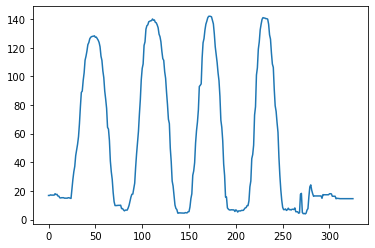

In [24]:
angle12list = dfsample['angle12'].tolist()
plt.plot(angle12list)
plt.show()

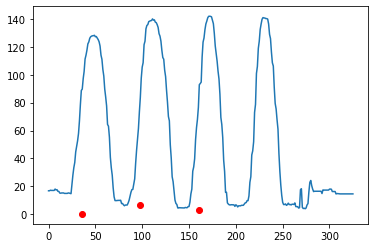

In [25]:
#Create reps:TBD

dfsample['angle12_diff90'] = np.absolute(dfsample['angle12'] - 90)
dfsample['min_angle12_diff90'] = dfsample.angle12_diff90[(dfsample.angle12_diff90.shift(1) > dfsample.angle12_diff90) & (dfsample.angle12_diff90.shift(-1) > dfsample.angle12_diff90)
                                                  &(dfsample.angle12_diff90<=diff90_threshold)
                                                  &(dfsample.angle12.shift(1) < dfsample.angle12) & (dfsample.angle12.shift(-1) > dfsample.angle12)]
plt.scatter(dfsample.index, dfsample['min_angle12_diff90'], c='r') #reds indicate the start of a rep
dfsample.angle12.plot()

In [16]:
#mark the rep number for each timestamp

repnumber = np.ones(dfsample.shape[0]) #create an array of ones for rep number 
rep_count = 1
for row_index,row in dfsample.iterrows():
    #print('\nrow number:',row_index, '\n-------------')
    #print(row['min_angle12_diff90'])
    if (np.isnan(row['min_angle12_diff90'])):
        rep_count=rep_count
    else:
        rep_count=rep_count + 1
    #print(rep_count)
    repnumber[row_index] = rep_count
    
dfsample['repnumber'] = repnumber.astype(int)    

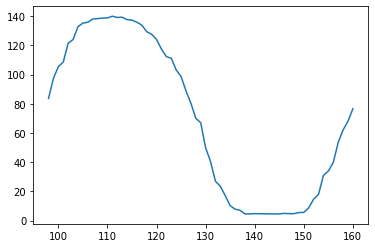

In [26]:
#Isolate data for each rep
repnum = 3
dfsub = dfsample[dfsample['repnumber'] ==repnum]
dfsub.angle12.plot()

In [31]:
#Geometric evaluation by rep
#Create a dataframe with max of angle12
dfsumm = dfsample.groupby('repnumber')['angle12'].max().rename('angle12_max').to_frame()

#append min of angle12
dfsumm['angle12_min'] = dfsample.groupby('repnumber')['angle12'].min()

#append min of angle23
dfsumm['angle23_min'] = dfsample.groupby('repnumber')['angle23'].min()

#append max of angle12
dfsumm['angle12_max'] = dfsample.groupby('repnumber')['angle12'].max()

#append max of angle23
dfsumm['angle23_max'] = dfsample.groupby('repnumber')['angle23'].max()

#append count of frames
dfsumm['angle12_count'] = dfsample.groupby('repnumber')['angle23'].count()

#Note that we might have to cut out beginning or end reps OR both

#find out if the squat is balanced and not too deep or not too shallow
#angle limits used here are based on simple math: 180 - knee flexion angle for too deep/ too shallow squat


dfsumm['resultEqual'] = 'Squat not properly balanced'
dfsumm.loc[(dfsumm['angle12_min']!=dfsumm['angle23_min']) & (dfsumm['angle12_min']!=dfsumm['angle23_min']), 'resultEqual'] = 'Squat properly balanced'

dfsumm['result12'] = 'Too deep in squat'
dfsumm.loc[dfsumm['angle12_min']<=60, 'result12'] = 'Good squat'
dfsumm['result23'] = 'Too shallow Squat'
dfsumm.loc[dfsumm['angle23_max']>=120, 'result23'] = 'Good Squat'
dfsumm['goodrep'] = 0
dfsumm.loc[(dfsumm['angle23_max']<=120) & (dfsumm['angle12_min']<=60), 'goodrep'] = 1
dfsumm

,angle12_max,angle12_min,angle23_min,angle23_max,angle12_count,resultEqual,result12,result23,goodrep
repnumber,,,,,,,,,
1,88.732357,14.773780,21.122436,88.777105,36,Squat properly balanced,Good squat,Too shallow Squat,1
2,128.273005,6.112812,16.419022,126.694432,62,Squat properly balanced,Good squat,Good Squat,0
3,140.025381,4.533396,15.911351,137.670262,63,Squat properly balanced,Good squat,Good Squat,0
4,141.934365,3.971798,15.764083,139.421620,165,Squat properly balanced,Good squat,Good Squat,0
